## Problem Statement

Given arrival and departure times of trains on a single day in a railway platform, **find out the minimum number of platforms required** so that no train has to wait for the other(s) to leave. *In other words, when a train is about to arrive, at least one platform must be available to accommodate it.* 

You will be given arrival and departure times both in the form of a list. The size of both the lists will be equal, with each common index representing the same train. Note: Time `hh:mm` would be written as integer `hhmm` for e.g. `9:30` would be written as `930`. Similarly, `13:45` would be given as `1345`

**Example:**<br>
Input:  A schedule of 6 trains:
```
arrival = [900,  940, 950,  1100, 1500, 1800]
departure = [910, 1200, 1120, 1130, 1900, 2000]
```
Expected output: Minimum number of platforms required = 3


### The greedy approach: 
Sort the schedule, and make sure when a train arrives or depart, keep track of the required number of platforms. We will have iterator `i` and `j` traversing the arrival and departure lists respectively. At any moment, the difference `(i - j)` will provide us the required number of platforms. 
    
At the time of either arrival or departure of a train, if `i^th` arrival is scheduled before the `j^th` departure, increment the `platform_required` and `i` as well. Otherwise, decrement `platform_required` count, and increase `j`. Keep track of the **max** value of `platform_required` ever, as the expected result. 
    


In [25]:
##### n*n
def min_platforms(arrival, departure):
    """
    :param: arrival - list of arrival time
    :param: departure - list of departure time
    TODO - complete this method and return the minimum number of platforms (int) required
    so that no train has to wait for other(s) to leave    
    """
    i = 1
    j = 0
    cur_num = 1
    max_num = 1
    while(i<len(arrival) and j<len(departure)):
        if i==j:
            i+=1
        elif arrival[i]>=departure[j]:
            j+=1
        else:
            cur_num = 2
            for _ in range(j+1,i):
                if arrival[i]<departure[_]:
                    cur_num += 1
            if cur_num > max_num:
                max_num = cur_num
            i+=1
#         print(max_num)
#         print(i,j)
    return max_num

In [26]:
arrival = [900,  940, 950,  1100, 1500, 1800]
departure = [910, 1200, 1120, 1130, 1900, 2000]
min_platforms(arrival, departure)

3

In [27]:
arrival = [200, 210, 300, 320, 350, 500]
departure = [230, 340, 320, 430, 400, 520]
min_platforms(arrival, departure)

2

In [35]:
arrival = [900,  940, 950,  1130, 1500, 1800]
departure = [910, 1200, 1120, 1140, 1900, 2000]
min_platforms(arrival, departure)

2

In [28]:
def test_function(test_case):
    arrival = test_case[0]
    departure = test_case[1]
    solution = test_case[2]
    
    output = min_platforms(arrival, departure)
    if output == solution:
        print("Pass")
    else:
        print("Fail")

In [29]:
arrival = [900,  940, 950,  1100, 1500, 1800]
departure = [910, 1200, 1120, 1130, 1900, 2000]
test_case = [arrival, departure, 3]

test_function(test_case)

Pass


In [34]:
arrival = [900,  940, 950,  1130, 1500, 1800]
departure = [910, 1200, 1120, 1140, 1900, 2000]
test_case = [arrival, departure, 2]

test_function(test_case)

Pass


In [30]:
arrival = [200, 210, 300, 320, 350, 500]
departure = [230, 340, 320, 430, 400, 520]
test_case = [arrival, departure, 2]
test_function(test_case)

Pass


##### 操他妈! Brilliant！
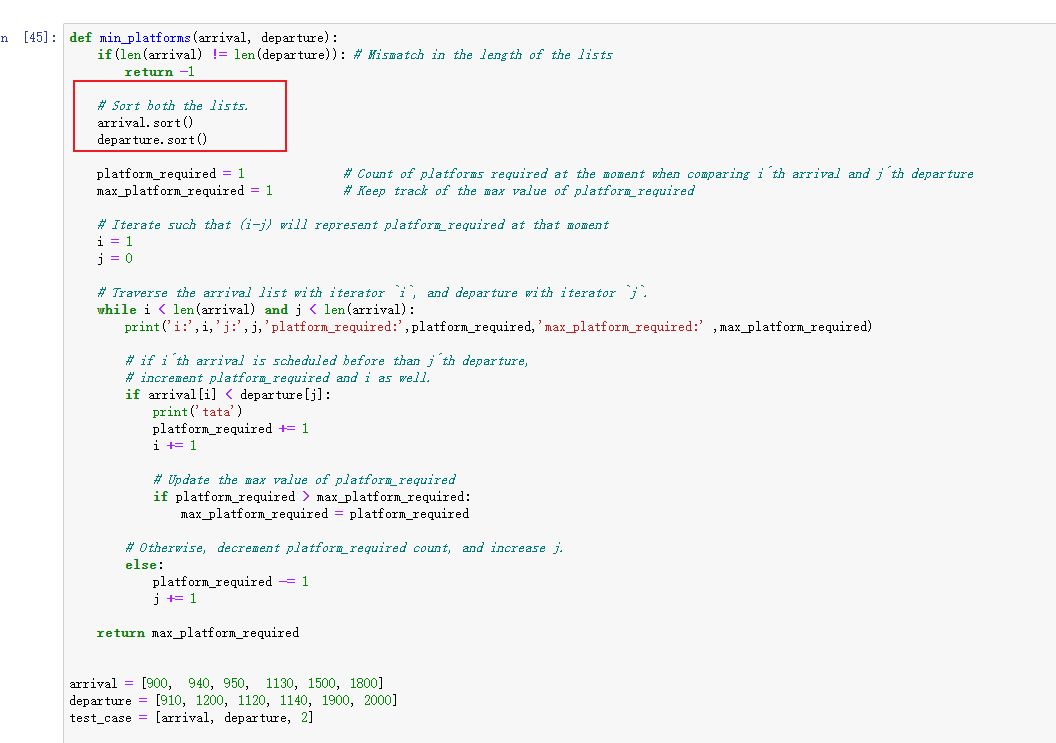

In [45]:
# n*log(n)
def min_platforms(arrival, departure):
    if(len(arrival) != len(departure)): # Mismatch in the length of the lists
        return -1

    # Sort both the lists.    
    arrival.sort()
    departure.sort()
    
    platform_required = 1              # Count of platforms required at the moment when comparing i^th arrival and j^th departure
    max_platform_required = 1          # Keep track of the max value of platform_required

    # Iterate such that (i-j) will represent platform_required at that moment
    i = 1
    j = 0

    # Traverse the arrival list with iterator `i`, and departure with iterator `j`.
    while i < len(arrival) and j < len(arrival):
        print('i:',i,'j:',j,'platform_required:',platform_required,'max_platform_required:' ,max_platform_required)
        
        # if i^th arrival is scheduled before than j^th departure, 
        # increment platform_required and i as well.
        if arrival[i] < departure[j]:
            print('tata')
            platform_required += 1
            i += 1

            # Update the max value of platform_required
            if platform_required > max_platform_required:
                max_platform_required = platform_required
         
        # Otherwise, decrement platform_required count, and increase j.
        else:
            platform_required -= 1
            j += 1

    return max_platform_required


arrival = [900,  940, 950,  1130, 1500, 1800]
departure = [910, 1200, 1120, 1140, 1900, 2000]
test_case = [arrival, departure, 2]

test_function(test_case)

i: 1 j: 0 platform_required: 1 max_platform_required: 1
i: 1 j: 1 platform_required: 0 max_platform_required: 1
tata
i: 2 j: 1 platform_required: 1 max_platform_required: 1
tata
i: 3 j: 1 platform_required: 2 max_platform_required: 2
i: 3 j: 2 platform_required: 1 max_platform_required: 2
tata
i: 4 j: 2 platform_required: 2 max_platform_required: 2
i: 4 j: 3 platform_required: 1 max_platform_required: 2
i: 4 j: 4 platform_required: 0 max_platform_required: 2
tata
i: 5 j: 4 platform_required: 1 max_platform_required: 2
tata
Pass


##### Standard Solutions
```python
def min_platforms(arrival, departure):
    if(len(arrival) != len(departure)): # Mismatch in the length of the lists
        return -1

    # Sort both the lists.    
    arrival.sort()
    departure.sort()
    
    platform_required = 1              # Count of platforms required at the moment when comparing i^th arrival and j^th departure
    max_platform_required = 1          # Keep track of the max value of platform_required

    # Iterate such that (i-j) will represent platform_required at that moment
    i = 1
    j = 0

    # Traverse the arrival list with iterator `i`, and departure with iterator `j`.
    while i < len(arrival) and j < len(arrival):
        
        # if i^th arrival is scheduled before than j^th departure, 
        # increment platform_required and i as well.
        if arrival[i] < departure[j]:
            platform_required += 1
            i += 1

            # Update the max value of platform_required
            if platform_required > max_platform_required:
                max_platform_required = platform_required
         
        # Otherwise, decrement platform_required count, and increase j.
        else:
            platform_required -= 1
            j += 1

    return max_platform_required
```